In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("time_series_df_1.csv")
df.head()

,Unnamed: 0,latitude,longitude,incident_datetime,criminal_rate
0,0,37.773467,-122.391434,2018-01-31,0.000000
1,1,37.756167,-122.406636,2018-01-31,0.008152
2,2,37.716156,-122.390002,2018-01-31,0.006793
3,3,37.780615,-122.416138,2018-03-31,0.009511
4,4,37.787765,-122.405041,2018-03-31,0.000000


In [4]:
df.describe()

,Unnamed: 0,latitude,longitude,criminal_rate
count,28850.000000,28850.000000,28850.000000,28850.000000
mean,14424.500000,37.762091,-122.430072,0.019556
std,8328.421969,0.026712,0.029543,0.033419
min,0.000000,37.708020,-122.511295,0.000000
25%,7212.250000,37.739276,-122.446284,0.006793
50%,14424.500000,37.765183,-122.423498,0.009511
75%,21636.750000,37.783691,-122.408595,0.020380
max,28849.000000,37.829991,-122.363743,1.000000


<Axes: >

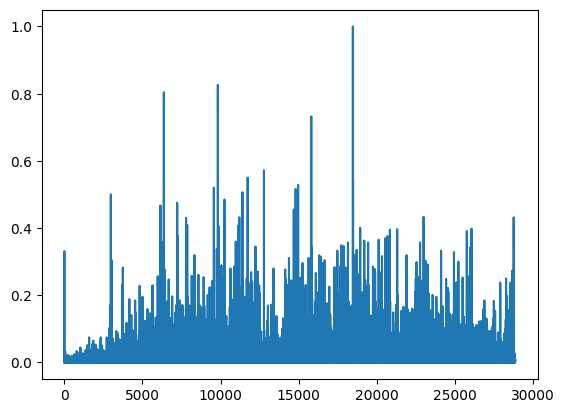

In [5]:
df["criminal_rate"].plot(kind="line")

In [8]:
df['lat|lng'] = df.apply( lambda x: str(x['latitude'])+"|"+str(x["longitude"]), axis=1)

In [9]:
df['lat|lng'].value_counts()

lat|lng
37.7839325760642|-122.4125952775858       30
37.7751608100771|-122.40363551943442      26
37.77346692060748|-122.39143433652146     23
37.7984422945084|-122.40987875494628      20
37.76257883049033|-122.42166247826908     19
                                          ..
37.75522792768016|-122.44034493696574      1
37.75196033846789|-122.4363768720082       1
37.74491245872787|-122.4182005264714       1
37.726083693335056|-122.4095268662561      1
37.753945370890655|-122.47018996013026     1
Name: count, Length: 6013, dtype: int64

In [27]:
final_df = df.groupby(['latitude', 'longitude']).agg({"criminal_rate":["count","mean"]}).reset_index()
final_df.columns = ['latitude',"longitude", "count", "avg_score"]

In [29]:
final_df.to_csv("combined_risk_score.csv")

In [22]:
df.groupby(['latitude', 'longitude']).size()


latitude   longitude  
37.708020  -122.412497    8
37.708058  -122.441986    2
37.708215  -122.452347    1
37.708256  -122.454281    4
37.708311  -122.420083    9
                         ..
37.829549  -122.371429    8
37.829617  -122.373178    8
37.829662  -122.375600    7
37.829792  -122.375324    5
37.829991  -122.374594    7
Length: 6013, dtype: int64

In [31]:
final_df.sort_values("avg_score")

,latitude,longitude,count,avg_score
5333,37.793074,-122.408545,1,0.000000
2703,37.752778,-122.422910,1,0.000000
2702,37.752777,-122.469894,1,0.000000
2648,37.752045,-122.483844,1,0.000000
4870,37.785539,-122.460308,1,0.000000
...,...,...,...,...
923,37.726950,-122.476039,17,0.202765
4498,37.779992,-122.413487,14,0.210695
4440,37.779212,-122.410937,14,0.237384
4500,37.780006,-122.411933,11,0.240983
